这里将吴恩达的Coursera的机器学习代码进行python上的实现。[课程地址](https://www.coursera.org/course/ml)
### 2 . 逻辑回归
这个笔记主要包括机器学习的第二次编程练习。具体实现要求见[这里](ex2.pdf)


额外练习：  
在本章，我们将接触到numpy的几个乘法，在这里进行练习以便能够更好熟悉掌握他们的用法  
* np.dot()
* np.multiply()
* np 的\*

介绍： 
> * np.dot() 为矩阵操作，即 对于M\* N 的A矩阵于N \*M的B矩阵进行dot运算，得到将是M\* M的矩阵  
> * np.multiply() 对应的数字相城。也就C[i,j]=A[i,j] \* A[i,j]  
> * \*星号操作符 这个操作在数组和矩阵的操作结果会不相同。具体表现在当操作的是数组时候，星号将表现为multiply的性质，当操作为矩阵时候，表现为 矩阵操作  

让我们更加直观练习一下他们吧！


In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
a = np.arange(10,14).reshape(2,2)
b = np.arange(0,4).reshape(2,2)
dot_result = np.dot(a,b)
mul_result = np.multiply(a,b)
print ("a :\n%s"%(a))
print ("b:\n %s"%(b))
print ( "the dot result is\n %s"%(dot_result))
print ("the mul result is \n%s"%(mul_result))

a :
[[10 11]
 [12 13]]
b:
 [[0 1]
 [2 3]]
the dot result is
 [[22 43]
 [26 51]]
the mul result is 
[[ 0 11]
 [24 39]]


这里演示\*在数组和矩阵得到不同的结果。  
此外在操作数组过程中，一定要弄清楚它的shape，否则会出现不同的结果。

In [3]:
A = np.arange(1,5).reshape(2,2)
B = np.arange(0,4).reshape(2,2)
print A*B
print (np.mat(A))*(np.mat(B)) 

[[ 0  2]
 [ 6 12]]
[[ 4  7]
 [ 8 15]]


问题描述
> * 在这部分的练习中，你将建立一个逻辑回归模型来预测一个学生是否被录取进大学。
> * 假设你是大学部门的管理者，你想根据两次考试的结果来确定每个申请者的录取机会。 您可以从以前的申请人获得历史数据，您可以将其用作逻辑回归的训练集。 对于每个培训的例子，你有两个考试的申请人的分数和录取决定。

In [4]:
data = np.loadtxt("ex2data1.txt",delimiter=",")
X = data[:,0:-1]
y = data[:,-1]

#### 2.1.1数据显示
可视化数据

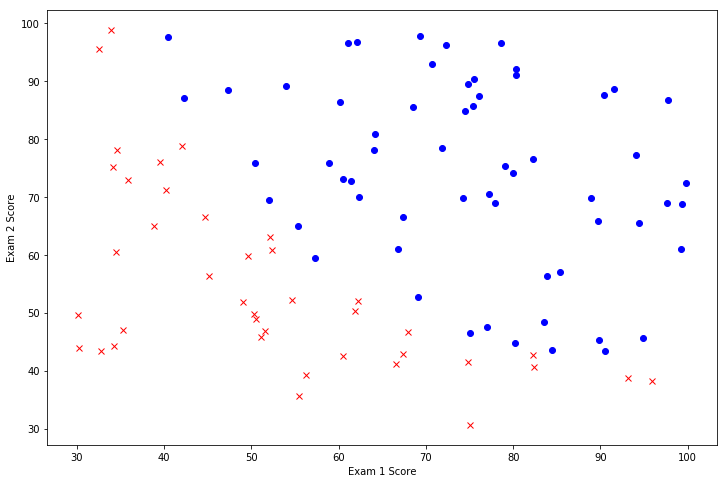

In [5]:
def plot_data(X,y):
    pos = np.where(y==1)    
    neg = np.where(y==0)    
    #作图
    plt.figure(figsize=(12,8))
    plt.plot(X[pos,0],X[pos,1],'bo')        # 蓝色表示录取
    plt.plot(X[neg,0],X[neg,1],'rx')        # 红色表示没录取
    plt.xlabel("Exam 1 Score")
    plt.ylabel("Exam 2 Score")
    plt.show()
plot_data(X,y) 

可以看到在两类之间是有一点边界。那现在我们就来训练吧，找到这条分界线。让我们撸起柚子干起来！
####  2.1.2 Sigmoid函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
看起来很玄乎，让我们来定义这样的一个函数

In [6]:
def sigmoid(Z):
    A = 1.0/(1+np.exp(-Z))
    return A

接下来，需要编写代价函数来评估结果。  
代价函数描述为：  
$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$  
我们来定义一下：

In [7]:
def cost(theta,X,y):
    AL = sigmoid(np.dot(X,theta.T))
    first = np.multiply(-y.T,np.log(AL))
    second = np.multiply(1-y.T,np.log(1-AL))
    cost = np.sum(first-second)
    cost = cost/(len(X))
    return cost

#### 2.1.3初始化参数

In [8]:
insert_ones = np.ones(X.shape[0])
X = np.c_[insert_ones,X]
y = y.reshape(y.shape[0],1)
theta = np.zeros(3)


In [9]:
print X.shape,y.shape,theta.shape
print cost(theta,X,y)

(100L, 3L) (100L, 1L) (3L,)
0.69314718056


#### 2.1.3 梯度下降

* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [10]:
def gradientDescent(theta,X,y):
    parameters = int(theta.ravel().shape[0])
    grad = np.zeros(parameters)
    
    error = sigmoid(np.dot(X,theta.T))-y.T
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        grad[i] = np.sum(term)/len(X)
    return grad

In [11]:
gradientDescent(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

In [12]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradientDescent, args=(X, y))
result

(array([-25.16131874,   0.20623159,   0.20147149]), 36, 0)

In [13]:
cost(result[0],X,y)

0.203497701589474

接下来，编写一个函数用来对数据进行输出预测。这里我们使用
\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
当${{h}_{\theta }}$大于等于0.5时，预测 y=1

当${{h}_{\theta }}$小于0.5时，预测 y=0 。  
让我们来进行开始编写预测函数吧。

In [14]:
def predict(theta,X):
    h_theta = sigmoid(X*theta.T)
    predict_result = [1 if x>=0.5 else 0 for x in h_theta]
    return predict_result

接下来，我们看看我们预测的结果是多少吧！

In [15]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
